Hello and welcome to this notebook where we will be going over average temperature increase/decrease and plotting it so that we can visualize it clearly!

In [1]:
import pandas as pd
import geopandas as gpd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
temp_data=pd.read_csv("../input/daily-temperature-of-major-cities/city_temperature.csv", index_col="Country", usecols=['Country', 'City', 'Month','Day', 'Year', 'AvgTemperature'])
temp_data.index = temp_data.index.str.replace('US','United States')

Since we have read our data in we need to make sure that no bad data is in here. We are only going to be dealing with the years 1995 and 2019 to see the variation of temperaure over time so we need to remove NAN values (which is why we dropped the state column) and temperatures like -99 which don't make sense.

We are handling temperatures from 1995 and sorting that data by the Country, City, Month and Day. Also we are making sure that -99 is removed from the dataset.

In [3]:
past_temp_data =temp_data.loc[temp_data.Year.isin(['1995'])]
temp_1995=past_temp_data.loc[:,['City', 'Month', 'Day', 'AvgTemperature']]
temp_1995_filtered = temp_1995[temp_1995['AvgTemperature'] != -99.0] 
temp_1995_filtered.loc[temp_1995_filtered.City == 'Algiers']
temp_1995_filtered

,City,Month,Day,AvgTemperature
Country,,,,
Algeria,Algiers,1,1,64.2
Algeria,Algiers,1,2,49.4
Algeria,Algiers,1,3,48.8
Algeria,Algiers,1,4,46.4
Algeria,Algiers,1,5,47.9
...,...,...,...,...
United States,San Juan Puerto Rico,12,27,79.5
United States,San Juan Puerto Rico,12,28,80.6
United States,San Juan Puerto Rico,12,29,78.8


Now we are doing the same thing, but with 2019 so we can compare both data sets.

In [4]:
future_temp_data =temp_data.loc[temp_data.Year.isin(['2019'])]
temp_2019=future_temp_data.loc[:,['City', 'Month','Day', 'AvgTemperature']]
temp_2019_filtered = temp_2019[temp_2019['AvgTemperature'] != -99.0] 
temp_2019_filtered

,City,Month,Day,AvgTemperature
Country,,,,
Algeria,Algiers,1,1,50.6
Algeria,Algiers,1,2,49.9
Algeria,Algiers,1,3,50.9
Algeria,Algiers,1,4,50.6
Algeria,Algiers,1,5,49.7
...,...,...,...,...
United States,Cheyenne,12,27,25.1
United States,Cheyenne,12,28,23.3
United States,Cheyenne,12,29,17.5


Now we will merge the data into one data set so it is easy to compare them and take the difference of the temperatures of 2019 and 1995 and sort it by the Month and Day so we can eventually find the average temperature difference from 1995 to 2019.

In [5]:
merged_temp_df=pd.merge(temp_2019_filtered, temp_1995_filtered, on=['Country', 'City', 'Month', 'Day'], how='inner')
merged_temp_df['Temp_Difference']=merged_temp_df['AvgTemperature_x']-merged_temp_df['AvgTemperature_y']
merged_temp_df.head()

,City,Month,Day,AvgTemperature_x,AvgTemperature_y,Temp_Difference
Country,,,,,,
Algeria,Algiers,1,1,50.6,64.2,-13.6
Algeria,Algiers,1,2,49.9,49.4,0.5
Algeria,Algiers,1,3,50.9,48.8,2.1
Algeria,Algiers,1,4,50.6,46.4,4.2
Algeria,Algiers,1,5,49.7,47.9,1.8


Now that we have the 'Temp_Difference' column we can take the mean of the differences by Month and Day so we have one solid average differnce for each World City.

In [6]:
temp_difference_df=merged_temp_df.groupby(['Country', 'City']).Temp_Difference.mean()
final_temp_df=temp_difference_df.sort_values(ascending=False)
final_temp_df=final_temp_df.to_frame()
print(final_temp_df.to_string())

                                               Temp_Difference
Country                  City                                 
United States            Anchorage                    5.279726
Poland                   Warsaw                       5.050975
United States            Fairbanks                    4.727123
Romania                  Bucharest                    4.563510
Kazakhstan               Almaty                       4.484123
Italy                    Milan                        4.480392
Japan                    Osaka                        4.477994
United Arab Emirates     Dubai                        4.423120
Yugoslavia               Belgrade                     3.992201
Hungary                  Budapest                     3.801671
Bulgaria                 Sofia                        3.785237
Qatar                    Doha                         3.767409
Austria                  Vienna                       3.745278
Bahrain                  Manama                       3

We can plot the data to see which cities had the highest average increase in temperature from 1995 to 2019. We see that Anchorage, Alaska has the highest average increase with about 5.28 degrees.

Text(0, 0.5, 'Increase in Temperature')

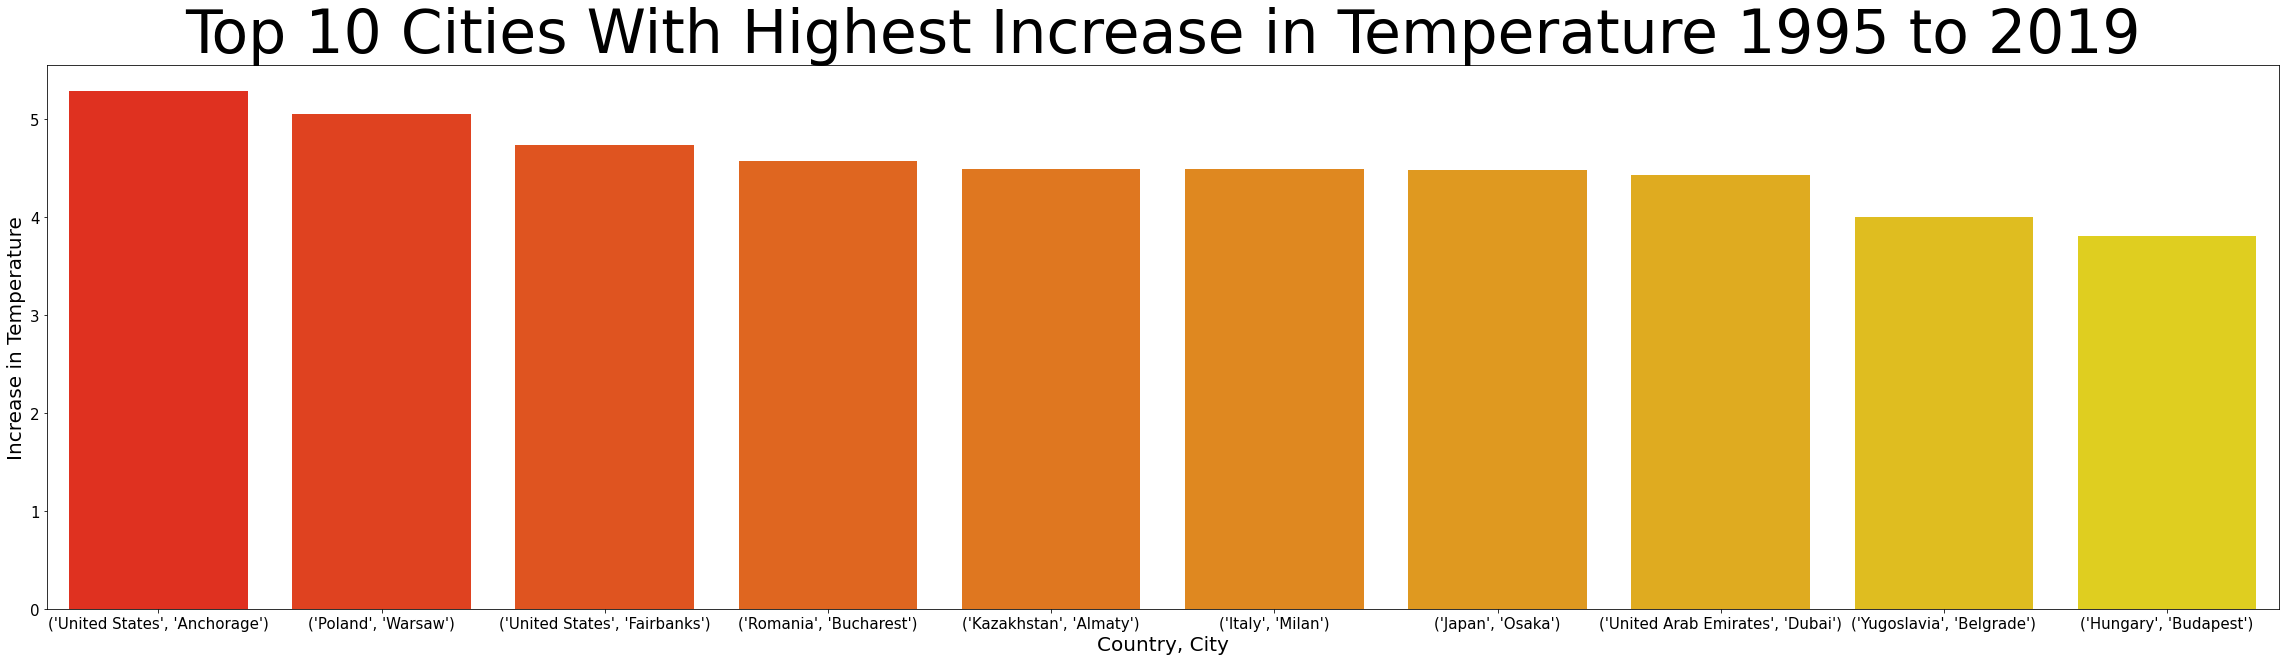

In [7]:
plt.figure(figsize=(40,10))
plt.title("Top 10 Cities With Highest Increase in Temperature 1995 to 2019", fontsize=60)
plt.tick_params(labelsize=15)
plt.xlabel("Country, City", fontsize=20)
sns.barplot(x=final_temp_df.head(10).index, y=final_temp_df.head(10)['Temp_Difference'],palette='autumn')
plt.ylabel("Increase in Temperature", fontsize=20)

We can also do the opposite and see which contries had the highest average decrease in temperature from 1995 to 2019 and plot the data to make it clear. We can see that Monterry, Mexico has the highest average decrease with about -3.58 degrees.

Text(0, 0.5, 'Decrease in Temperature')

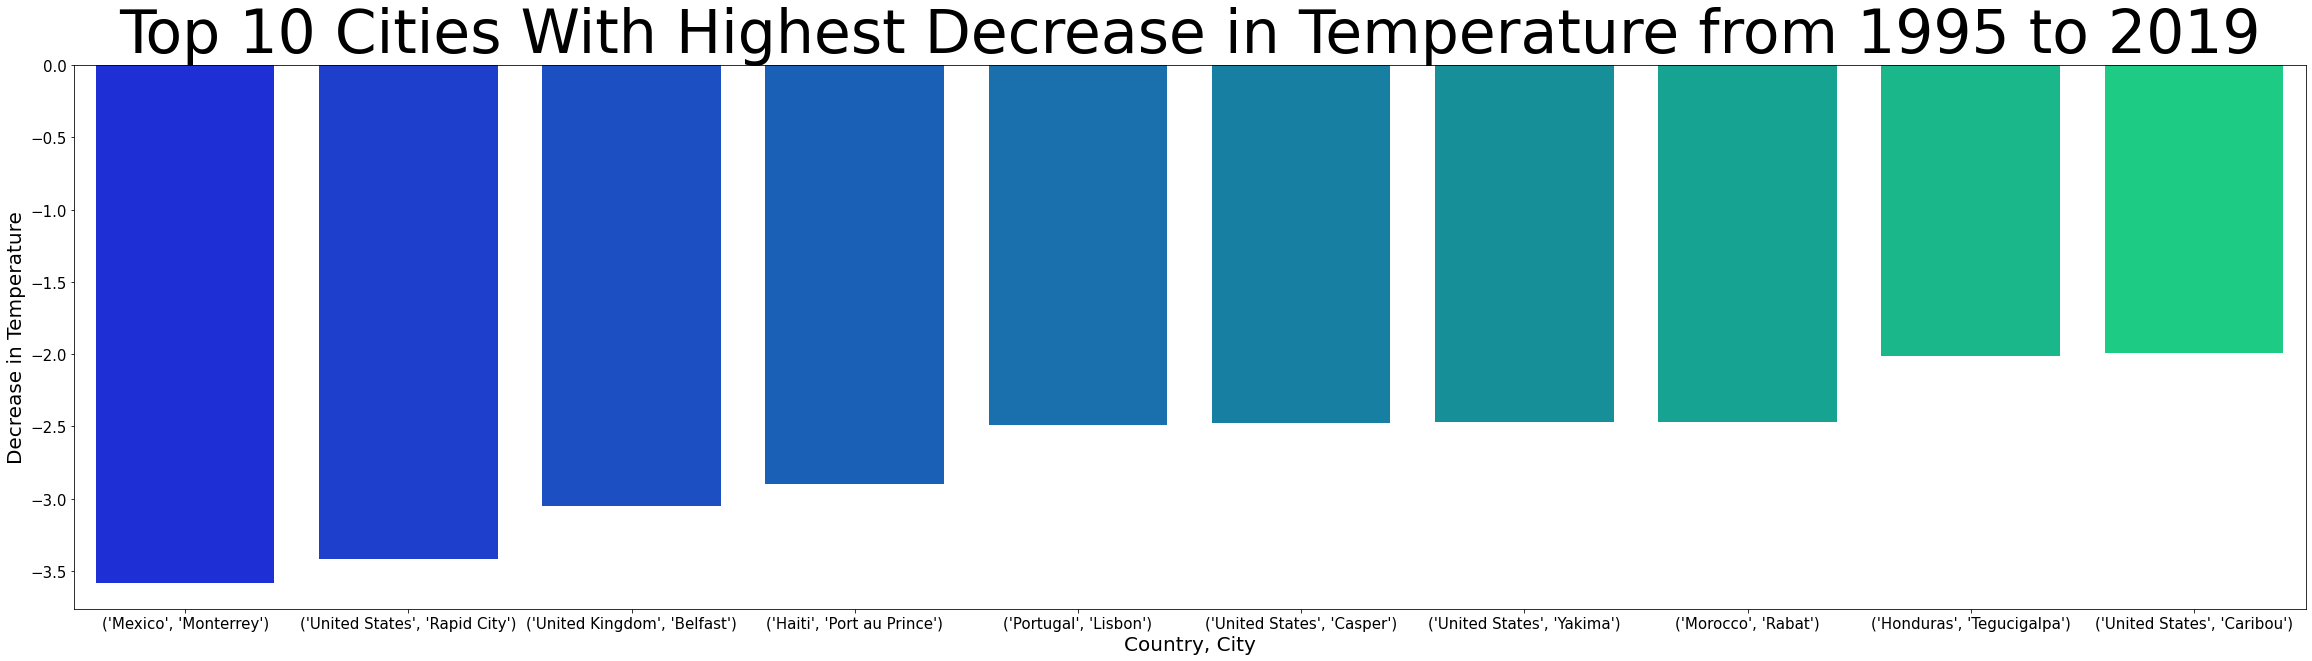

In [8]:
opp_final_temp_df=temp_difference_df.sort_values(ascending=True)
plt.figure(figsize=(40,10))
plt.title("Top 10 Cities With Highest Decrease in Temperature from 1995 to 2019", fontsize=60)
plt.tick_params(labelsize=15)
plt.xlabel("Country, City", fontsize=20)
sns.barplot(x=opp_final_temp_df.head(10).index, y=opp_final_temp_df.head(10),palette='winter')
plt.ylabel("Decrease in Temperature", fontsize=20)

Finally, it would be nice to plot this data on a world map in order to see the average temperature differences all over the world at once.

Here we are renaming columns so we can merge the map with the data so that it will show up once we plot it and we are checking to see if it worked with the City Fairbanks in Alaska.

In [9]:
map_df = gpd.read_file("../input/worldm/World_Map.shp")
map_dff=gpd.read_file("../input/wcities/a4013257-88d6-4a68-b916-234180811b2d202034-1-1fw6kym.nqo.shp")
map_dff=map_dff.rename(columns = {'CNTRY_NAME':'Country'})
map_dff=map_dff.rename(columns = {'CITY_NAME':'City'}) 
map_dff.loc[map_dff.City =='Fairbanks']

,FID,ObjectID,City,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,Country,STATUS,POP,POP_RANK,POP_CLASS,PORT_ID,LABEL_FLAG,geometry
302,303,179,Fairbanks,USA-ALK,Alaska,US,United States,Other,30224,7,"Less than 50,000",0,0,POINT (-147.65118 64.83874)


Now we are plotting the data on the map to see the all the cities with the average temperature differences represented as colored dots.

Text(0.5, 1.0, 'Average Temperature Increase from 1995 to 2020')

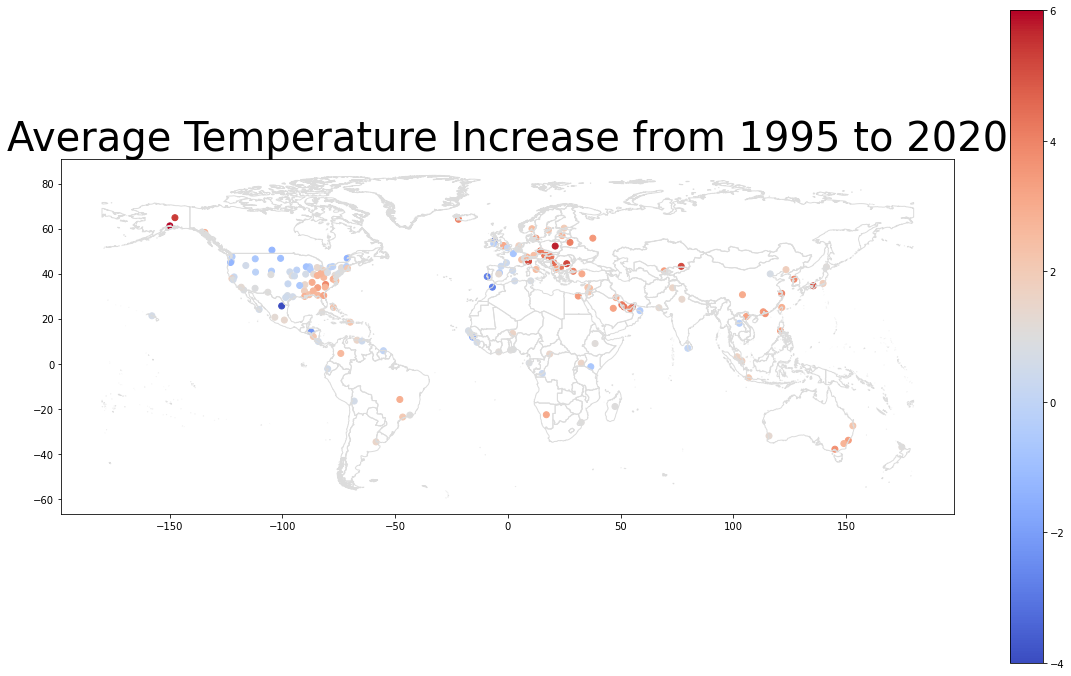

In [10]:
merged = pd.merge(map_dff,final_temp_df[['Temp_Difference']],on='City')
ax=map_df.plot(figsize=(20,12), color='none', edgecolor='gainsboro', zorder=3)
vmin, vmax = -4, 6
merged.plot(column='Temp_Difference',cmap='coolwarm', ax=ax)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmax=vmax, vmin=vmin))
sm._A = []
cbar = plt.colorbar(sm)
ax.set_title('Average Temperature Increase from 1995 to 2020', fontdict={'fontsize': '40', 'fontweight' : '3'})